<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

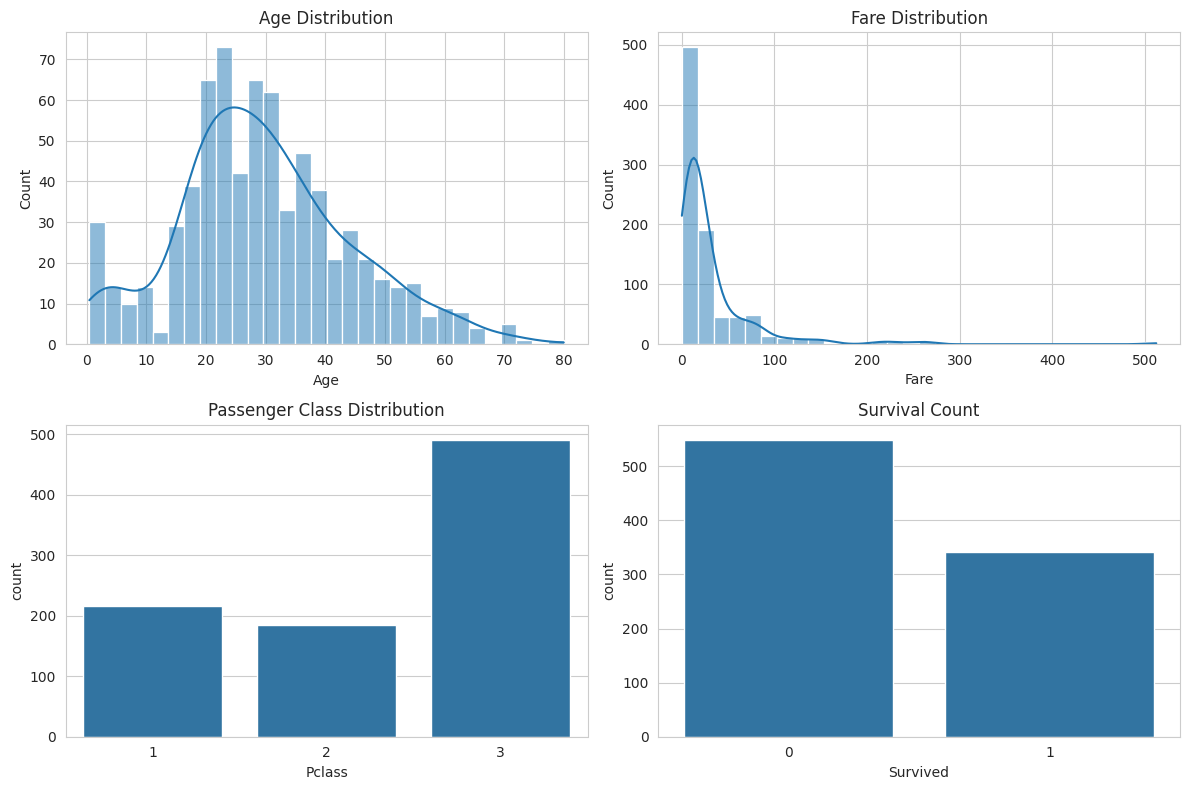

<ipython-input-1-534852fcad46>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
<ipython-input-1-534852fcad46>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Model and scaler saved successfully!
Accuracy: 0.7989
Precision: 0.7714
Recall: 0.7297
F1 Score: 0.7500
ROC-AUC Score: 0.8804


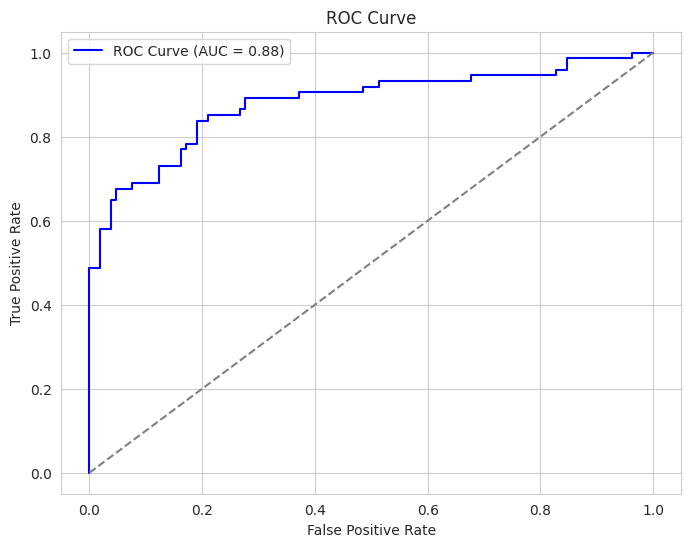

 Feature  Coefficient
     Sex     2.581274
Embarked     0.223992
    Fare     0.146037
   Parch    -0.099567
   SibSp    -0.301858
     Age    -0.400237
  Pclass    -0.957476


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the Titanic dataset
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

# Exploratory Data Analysis (EDA)
print(train_df.info())
print(train_df.describe())

# Visualizations
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(train_df["Age"].dropna(), bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

sns.histplot(train_df["Fare"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Fare Distribution")

sns.countplot(x="Pclass", data=train_df, ax=axes[1, 0])
axes[1, 0].set_title("Passenger Class Distribution")

sns.countplot(x="Survived", data=train_df, ax=axes[1, 1])
axes[1, 1].set_title("Survival Count")

plt.tight_layout()
plt.show()

# Handling Missing Values
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
train_df.drop(columns=["Cabin"], inplace=True)

# Encode Categorical Variables
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
train_df["Embarked"] = train_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Define Features and Target Variable
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Numerical Features
scaler = StandardScaler()
X_train[["Age", "Fare"]] = scaler.fit_transform(X_train[["Age", "Fare"]])
X_test[["Age", "Fare"]] = scaler.transform(X_test[["Age", "Fare"]])

# Build and Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save model and scaler for Streamlit app
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Model and scaler saved successfully!")

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Logistic Regression Coefficients
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_[0]}).sort_values(by="Coefficient", ascending=False)
print(coefficients.to_string(index=False))  # Prints cleanly without DataFrame index


In [3]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [4]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the trained model
model_path = "logistic_regression_model.pkl"
with open(model_path, "rb") as file:
    model = pickle.load(file)

# Load the scaler
scaler_path = "scaler.pkl"
with open(scaler_path, "rb") as file:
    scaler = pickle.load(file)

# Streamlit UI
st.title("Titanic Survival Prediction")
st.markdown("Enter passenger details to predict survival probability.")

# User inputs
pclass = st.selectbox("Passenger Class (1 = First, 2 = Second, 3 = Third)", [1, 2, 3])
sex = st.selectbox("Sex", ["Male", "Female"])
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Number of Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
parch = st.number_input("Number of Parents/Children Aboard", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare Paid", min_value=0.0, max_value=600.0, value=30.0)
embarked = st.selectbox("Port of Embarkation (0 = S, 1 = C, 2 = Q)", [0, 1, 2])

# Convert categorical inputs
sex = 1 if sex == "Female" else 0

# Prepare input features as DataFrame
input_data = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]],
                          columns=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"])

# Scale age and fare
input_data[["Age", "Fare"]] = scaler.transform(input_data[["Age", "Fare"]])

# Predict
if st.button("Predict Survival"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]
    result = "Survived" if prediction == 1 else "Did Not Survive"
    st.write(f"### Prediction: {result}")
    st.write(f"Survival Probability: {probability:.2f}")

st.markdown("---")
st.markdown("Developed with ❤️ using Streamlit")


2025-04-03 12:53:51.808 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 12:53:51.897 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-03 12:53:51.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 12:53:51.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 12:53:51.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 12:53:51.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 12:53:51.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-03 12:53:51.905 Thread 'MainThread': mi

DeltaGenerator()

In [5]:
import pickle

# Save the trained model
model_path = "logistic_regression_model.pkl"
with open(model_path, "wb") as file:
    pickle.dump(model, file)

# Save the scaler
scaler_path = "scaler.pkl"
with open(scaler_path, "wb") as file:
    pickle.dump(scaler, file)
